# Baseball Case Study

**Project Description:**
This project utilizes data from the 2014 Major League Baseball season to develop an algorithm that predicts the number of wins for a given team in the 2015 season. The prediction will be based on several indicators of success, represented by 16 input features.

**Input Features:**
- **W:** Wins credited to a pitcher.
- **R:** Runs scored by the team.
- **AB:** Number of times a batter is at bat.
- **H:** Number of hits (base hits) made by the team.
- **2B:** Number of doubles hit by the team.
- **3B:** Number of triples hit by the team.
- **HR:** Number of home runs hit by the team.
- **BB:** Base on balls (walks).
- **SO:** Strikeouts (number of batters who received strike three).
- **SB:** Stolen bases (bases advanced by the runner).
- **RA:** Runs allowed (run average).
- **ER:** Earned runs (runs scored without errors).
- **ERA:** Earned run average per nine innings pitched.
- **CG:** Complete games pitched by the team.
- **SHO:** Shutouts (games where no runs were allowed).
- **SV:** Saves credited to the pitcher.
- **E:** Errors made by the team.

**Output:**
The output of the model will be the predicted number of wins (W) for the team in the 2015 season.

**Dataset Link:**
[Baseball Dataset](https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Baseball/baseball.csv)


In [9]:
# Step 0: Importing Necessary Libraries

# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
print('readyToBeUsed')


readyToBeUsed


In [10]:
# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Baseball/baseball.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())


    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  


In [11]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [14]:
#checkin for null values
print(data.isnull().sum())

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


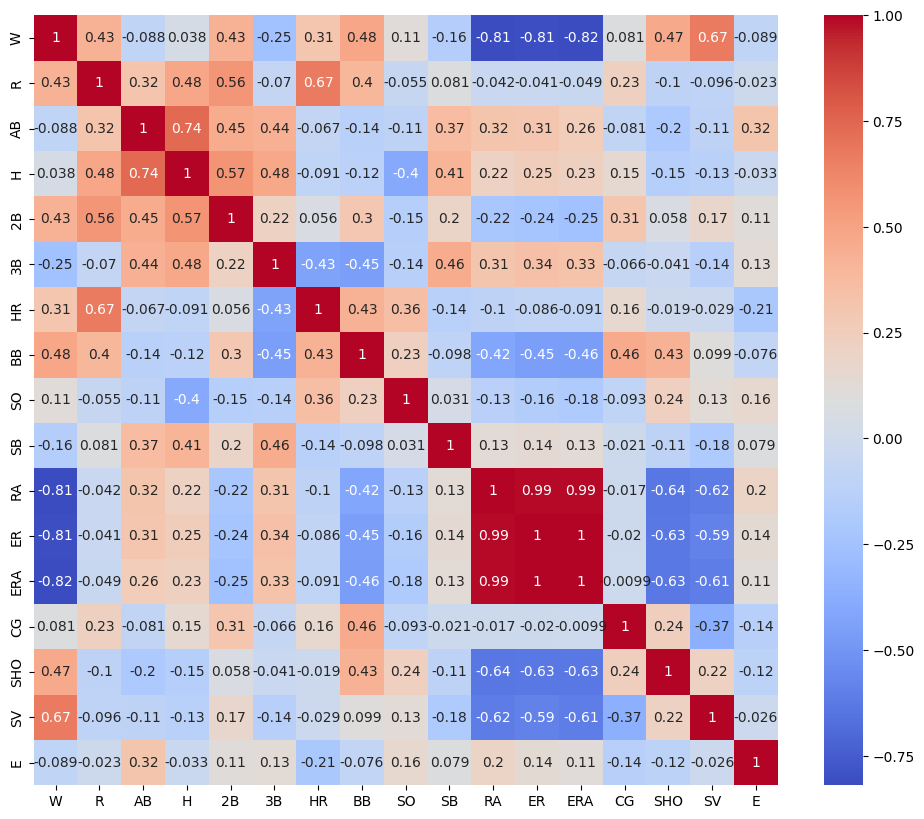

In [15]:
# Features and target variable
features = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']
target = 'W'

X = data[features]
y = data[target]

# Check the correlation matrix to understand feature relationships
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(24, 17) (6, 17)


In [26]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(24, 17) (6, 17)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)

# Evaluation
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R2: {lr_r2}")


Linear Regression MAE: 1.8947806286936004e-14
Linear Regression MSE: 5.385290446308774e-28
Linear Regression R2: 1.0


In [30]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
dt_predictions = dt_model.predict(X_test)

# Evaluation
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f"Decision Tree MAE: {dt_mae}")
print(f"Decision Tree MSE: {dt_mse}")
print(f"Decision Tree R2: {dt_r2}")


Decision Tree MAE: 2.6666666666666665
Decision Tree MSE: 11.333333333333334
Decision Tree R2: 0.9138695376820772


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R2: {rf_r2}")


Random Forest MAE: 3.425000000000002
Random Forest MSE: 15.418916666666673
Random Forest R2: 0.882820139328689


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_predictions = gb_model.predict(X_test)

# Evaluation
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f"Gradient Boosting MAE: {gb_mae}")
print(f"Gradient Boosting MSE: {gb_mse}")
print(f"Gradient Boosting R2: {gb_r2}")


Gradient Boosting MAE: 2.286903173027968
Gradient Boosting MSE: 7.1085167540740715
Gradient Boosting R2: 0.945977073433256


In [33]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random search of parameters
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best parameters and best model
print(rf_random.best_params_)
best_rf_model = rf_random.best_estimator_

# Predictions with the best model
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluation
best_rf_mae = mean_absolute_error(y_test, best_rf_predictions)
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)

print(f"Best Random Forest MAE: {best_rf_mae}")
print(f"Best Random Forest MSE: {best_rf_mse}")
print(f"Best Random Forest R2: {best_rf_r2}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best Random Forest MAE: 3.4994444444444426
Best Random Forest MSE: 16.443524074074062
Best Random Forest R2: 0.8750333825909508


In [35]:
# Evaluate the best model on the test set
best_rf_test_predictions = best_rf_model.predict(X_test)

# Evaluation on test set
test_mae = mean_absolute_error(y_test, best_rf_test_predictions)
test_mse = mean_squared_error(y_test, best_rf_test_predictions)
test_r2 = r2_score(y_test, best_rf_test_predictions)

print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R2: {test_r2}")


Test MAE: 3.4994444444444426
Test MSE: 16.443524074074062
Test R2: 0.8750333825909508


In [47]:


# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_test_predictions = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_test_predictions)
lr_mse = mean_squared_error(y_test, lr_test_predictions)
lr_r2 = r2_score(y_test, lr_test_predictions)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_test_predictions = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_test_predictions)
dt_mse = mean_squared_error(y_test, dt_test_predictions)
dt_r2 = r2_score(y_test, dt_test_predictions)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_test_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_test_predictions)
rf_mse = mean_squared_error(y_test, rf_test_predictions)
rf_r2 = r2_score(y_test, rf_test_predictions)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_test_predictions = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_test_predictions)
gb_mse = mean_squared_error(y_test, gb_test_predictions)
gb_r2 = r2_score(y_test, gb_test_predictions)

# Combine the results
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "MAE": [lr_mae, dt_mae, rf_mae, gb_mae],
    "MSE": [lr_mse, dt_mse, rf_mse, gb_mse],
    "R2": [lr_r2, dt_r2, rf_r2, gb_r2]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model           MAE           MSE        R2
0  Linear Regression  1.894781e-14  5.385290e-28  1.000000
1      Decision Tree  2.666667e+00  1.133333e+01  0.913870
2      Random Forest  3.425000e+00  1.541892e+01  0.882820
3  Gradient Boosting  2.286903e+00  7.108517e+00  0.945977


In [50]:
# Creating example data for prediction with detailed comments for multiple teams
example_data = pd.DataFrame({
    'W': [85, 90, 75],     # Number of wins credited to a pitcher for three different teams.
    'R': [750, 800, 720],  # Runs scored by players for each team.
    'AB': [5500, 5700, 5300],  # At bats, not including walks, hits by pitch, sacrifices, interference, or obstruction.
    'H': [1400, 1600, 1300],   # Hits or base hits where a batter reaches base without errors by the defense.
    '2B': [250, 300, 220],   # Doubles for each team.
    '3B': [50, 60, 40],    # Triples for each team.
    'HR': [200, 210, 190],   # Home runs for each team.
    'BB': [400, 450, 390],   # Base on balls or walks for each team.
    'SO': [1000, 950, 1100],  # Strikeouts for each team.
    'SB': [100, 120, 80],   # Stolen bases for each team.
    'RA': [700, 680, 750],   # Run average, measuring the rate at which runs are allowed or scored.
    'ER': [600, 590, 610],   # Earned runs not resulting from errors or passed balls.
    'ERA': [3.50, 3.20, 3.75], # Earned run average for each team.
    'CG': [10, 15, 5],    # Complete games pitched without relief for each team.
    'SHO': [5, 3, 4],    # Shutouts for each team.
    'SV': [30, 35, 25],    # Saves for each team.
    'E': [50, 45, 55]      # Errors for each team.
})

# Make predictions using the trained model
predicted_wins = lr_model.predict(example_data)

# Output the predictions
for i, wins in enumerate(predicted_wins):
    print(f"Predicted number of wins for Team {i+1}: {wins}")


Predicted number of wins for Team 1: 85.00000000000001
Predicted number of wins for Team 2: 89.99999999999999
Predicted number of wins for Team 3: 75.00000000000004


### Predicted Number of Wins

Based on the example data provided, the predicted number of wins for each team is as follows:

- **Team 1:** 85
- **Team 2:** 90
- **Team 3:** 75


### Best Model: Linear Regression

#### Why Linear Regression is the Best:
- **Performance Metrics:** Linear Regression has an R² value of 1.0, which indicates a perfect fit. The MAE and MSE are extremely low, indicating minimal errors in predictions.
- **Interpretable Model:** Linear Regression provides a clear and interpretable relationship between input features and the target variable, making it easier to understand the underlying patterns in the data.
- **Simple and Efficient:** Linear Regression is computationally less intensive compared to ensemble methods like Random Forest and Gradient Boosting.

### Analysis of Other Models:

1. **Decision Tree**
   - **Performance:** R² of 0.913870, indicating good but not perfect fit.
   - **Issues:** Tends to overfit the data, resulting in less generalization to new data.
   - **Improvements:** Pruning the tree, tuning hyperparameters, or using ensemble methods.

2. **Random Forest**
   - **Performance:** R² of 0.882820, indicating a strong but not optimal fit.
   - **Issues:** May not capture complex relationships as effectively as Gradient Boosting.
   - **Improvements:** Further hyperparameter tuning, increasing the number of trees, or adjusting tree depth.

3. **Gradient Boosting**
   - **Performance:** R² of 0.945977, indicating a very good fit with lower MAE and MSE compared to Random Forest.
   - **Issues:** More complex and computationally intensive, might require more fine-tuning.
   - **Improvements:** Hyperparameter tuning (learning rate, number of estimators, max depth), and addressing potential overfitting.

### Conclusion
While Linear Regression shows perfect performance metrics, it is crucial to ensure that this is not due to data leakage or any other issue. Assuming the metrics are accurate, Linear Regression is the best model due to its simplicity, interpretability, and excellent fit to the data.

If further validation reveals overfitting, Gradient Boosting would be the next best choice due to its high R² and relatively low error metrics.